# Clustering and Fitting (40%)
# 7PAM2000-0105-2023 - Applied Data Science 1
# Student ID: 23032083

In [142]:
# Importing all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [143]:
# Read the data
df=pd.read_csv("BodyFat.csv")

# Make a copy of the dataset
df_copy=df.copy()

In [144]:
# Drop duplicate rows based on the "Age" column
df=df.drop_duplicates(subset="Age")

# Set the "Age" column as the index
df=df.set_index("Age")

# Sort the DataFrame by the index (age) in ascending order
df.sort_index(inplace=True)

# Drop unnecessary columns
df.drop(columns=['Original', 'Sex', 'Height','Hip','Ankle','Wrist','Forearm','Neck','Thigh'],inplace=True)

# Remove columns where all values are NaN
df.dropna(axis=1, how='all', inplace=True)

# Drop the first row
df.drop(df.index[0], inplace=True)

# Convert all remaining values to integers
df = df.astype(int)

# Display the modified DataFrame
df

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
Age,,,,,,
18,14,53,86,66,35,24
19,26,73,94,80,39,28
20,20,53,78,63,35,23
21,26,63,83,71,35,27
22,6,78,93,83,37,30
23,12,69,93,85,37,32
24,28,83,97,100,42,32
25,12,79,99,88,39,30
26,10,83,101,86,37,32


In [145]:
# Descriptive statistics for the DataFrame
df.describe()

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,20.745455,81.945455,101.200000,93.690909,38.236364,32.054545
std,8.965403,17.547204,10.539871,14.331877,2.847765,3.913028
min,3.000000,53.000000,78.000000,63.000000,33.000000,23.000000
25%,14.500000,72.500000,96.500000,84.500000,37.000000,29.500000
50%,21.000000,81.000000,101.000000,95.000000,38.000000,32.000000
75%,28.000000,91.000000,106.000000,100.000000,39.500000,35.000000
max,40.000000,164.000000,136.000000,148.000000,49.000000,45.000000


In [146]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 18 to 81
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BodyFat  55 non-null     int32
 1   Weight   55 non-null     int32
 2   Chest    55 non-null     int32
 3   Abdomen  55 non-null     int32
 4   Knee     55 non-null     int32
 5   Biceps   55 non-null     int32
dtypes: int32(6)
memory usage: 1.7 KB


In [147]:
# Define specific index values to filter
specific_index_values = [18, 24, 35, 44, 55, 67,72,81]

# Filter the DataFrame using the specified index values
df_filtered = df.loc[specific_index_values] 

In [148]:
# Create a copy of the filtered DataFrame
df_filtered_pie=df_filtered.head().copy()

# Display the copied DataFrame
df_filtered_pie

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
Age,,,,,,
18,14,53,86,66,35,24
24,28,83,97,100,42,32
35,22,85,101,96,39,36
44,32,92,106,104,42,33
55,30,83,103,100,40,34


## Pie chart

In [149]:
# Calculate the total body fat
total=df_filtered_pie["BodyFat"].sum()

# Calculate the percentage of body fat for each row
df_filtered_pie["BodyFat_percentage(%)"]=(df_filtered_pie["BodyFat"]/total)*100

# Round the percentage to one decimal place
df_filtered_pie["BodyFat_percentage(%)"]=df_filtered_pie["BodyFat_percentage(%)"].round(1)

# Display the DataFrame with the added percentage column
df_filtered_pie

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps,BodyFat_percentage(%)
Age,,,,,,,
18,14,53,86,66,35,24,11.1
24,28,83,97,100,42,32,22.2
35,22,85,101,96,39,36,17.5
44,32,92,106,104,42,33,25.4
55,30,83,103,100,40,34,23.8


In [150]:
def plot_pie(df_filtered_pie):
    """
    Plot a pie chart showing the distribution of body fat across age groups.
    """
    plt.figure(dpi=144)
    labels_with_age = [f'Age: {age}' for age in df_filtered_pie['BodyFat'].index]
    plt.pie(df_filtered_pie['BodyFat'], labels=labels_with_age,labeldistance=1.04, autopct='%1.1f%%', startangle=20)
    plt.title('Body Fat Distribution Across Age Groups',pad=15,fontweight='bold')
    plt.legend(loc='center right',bbox_to_anchor=(1.02, 0.55))
    plt.axis('Equal')
    plt.tight_layout()
    plt.show()

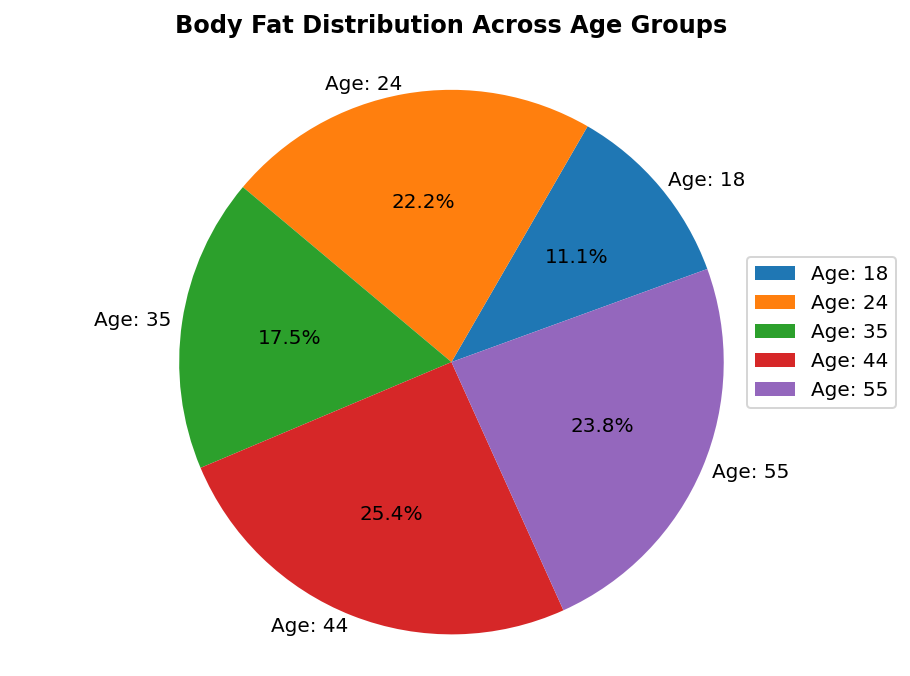

In [151]:
# Call the function
plot_pie(df_filtered_pie)

## Scatter Plot

In [152]:
# Display the filtered data
df_filtered

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
Age,,,,,,
18,14,53,86,66,35,24
24,28,83,97,100,42,32
35,22,85,101,96,39,36
44,32,92,106,104,42,33
55,30,83,103,100,40,34
67,31,74,97,95,38,29
72,27,76,101,99,36,29
81,21,73,96,95,37,31


In [153]:
def plot_scatter(data,x,y):
    """
    Plot a scatter plot of two variables.
    data : df_filtered(filtered data)
    x    : Body Fat
    y    : Weight
    """
    plt.figure(dpi=144)
    plt.scatter(df_filtered['BodyFat'], df_filtered['Weight'], color='blue')
    plt.xlabel('Body Fat',fontweight='bold')
    plt.ylabel('Weight',fontweight='bold')
    plt.title('Scatter Plot of Body Fat vs. Weight',pad=10,fontweight='bold')
    
    x=[10,15,20,25,30,35]
    plt.xticks(x)
    plt.grid(True)
    plt.show()
    return

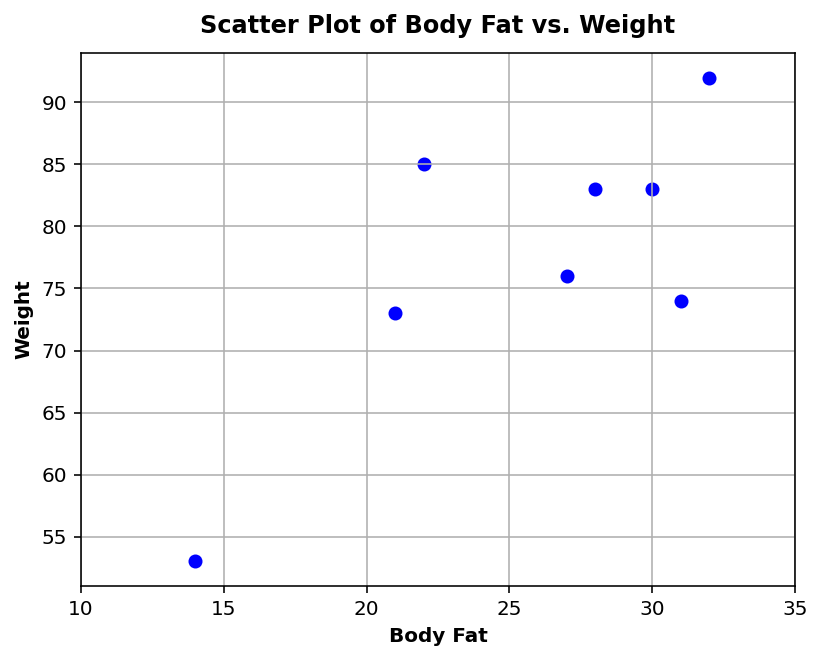

In [154]:
# Call the function
plot_scatter(df_filtered,'BodyFat','Weight')

In [155]:
# Individual with Maximum body fat and maximum weight
print("Max Body Fat :",df_filtered['BodyFat'].max())
weight_with_max_bodyfat =print("Weight with max BodyFat :",df_filtered.loc[df_filtered['BodyFat'].idxmax(), 'Weight'])

Max Body Fat : 32
Weight with max BodyFat : 92


## Heat Map

In [156]:
def plot_heat_map(df_filtered, method):
    """
    Plot a heatmap of the correlation matrix for the df_filtered DataFrame.

    Parameters:
    - df_filtered: DataFrame containing the data for which the correlation matrix will be computed.
    - method: Pearson
    """
    fig, ax = plt.subplots(dpi=144,figsize=(8, 6))
    mask = np.triu(np.ones_like(df_filtered.corr()))
    sns.heatmap(df_filtered.corr(method=method), ax=ax, vmin=-1, vmax=1,cmap='RdBu', annot=True, mask=mask)
    plt.title("Pearson Heat Map",fontweight='bold',fontsize=20)
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12,fontweight='bold')
    
    plt.tight_layout()
    plt.show() 
    return

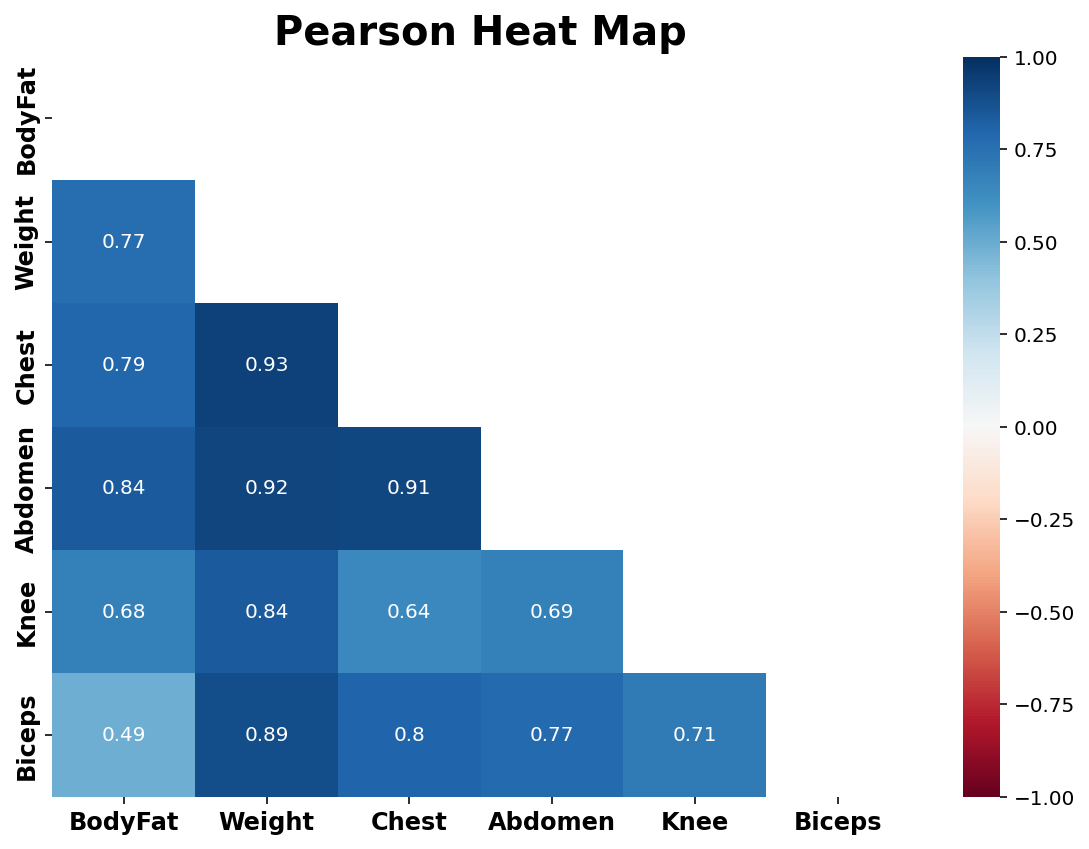

In [157]:
# Call the function
plot_heat_map(df_filtered,'pearson')

## Correlation Matrix

In [158]:
# Compute the correlation matrix for the DataFrame df_filtered
df_filtered.corr()

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
BodyFat,1.000000,0.765514,0.794108,0.840127,0.681384,0.488225
Weight,0.765514,1.000000,0.933019,0.921004,0.839383,0.888523
Chest,0.794108,0.933019,1.000000,0.909646,0.642620,0.797555
Abdomen,0.840127,0.921004,0.909646,1.000000,0.686412,0.773625
Knee,0.681384,0.839383,0.642620,0.686412,1.000000,0.708029
Biceps,0.488225,0.888523,0.797555,0.773625,0.708029,1.000000


## ELBOW METHOD

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

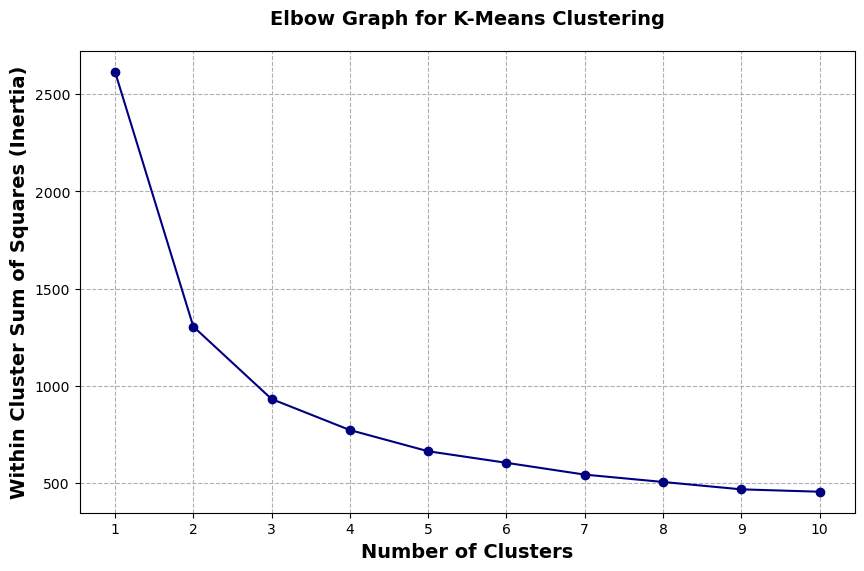

In [159]:
# Take the necessary data
data_for_clustering = df_copy[['BodyFat', 'Weight', 'Chest', 'Abdomen', 'Knee', 'Biceps']]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_data= scaler.fit_transform(data_for_clustering)

k_values = range(1, 11)
inertia_values =[ ]

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    
# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values, marker='o', color='navy', linestyle='-')
plt.title("Elbow Graph for K-Means Clustering", fontsize=14, fontweight='bold', pad=19)
plt.xlabel("Number of Clusters", fontsize=14, fontweight='bold')
plt.ylabel("Within Cluster Sum of Squares (Inertia)", fontsize=14, fontweight='bold')
plt.xticks(k_values)
plt.grid(linestyle='dashed')
plt.show()

## K MEANS CLUSTERING

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


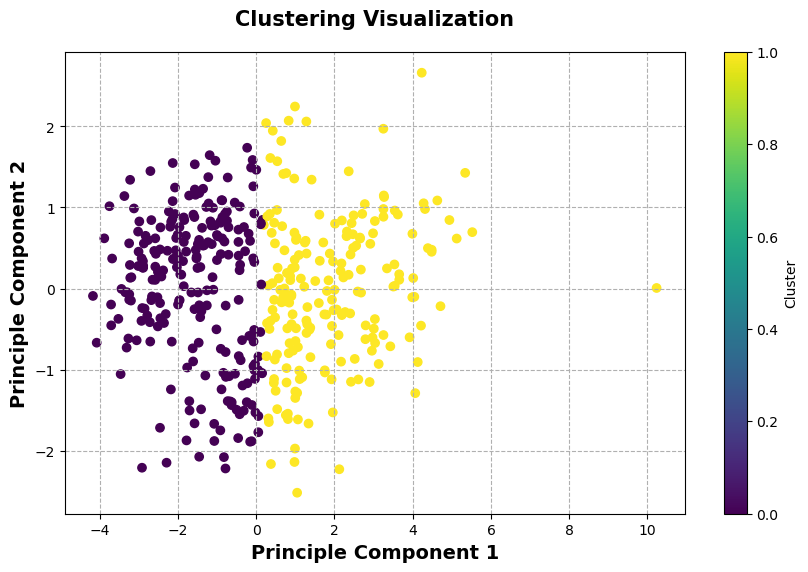

In [160]:
data_for_clustering = df_copy[['BodyFat', 'Weight', 'Chest', 'Abdomen', 'Knee', 'Biceps']]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_data= scaler.fit_transform(data_for_clustering)

pca= PCA(n_components=2)
p_components= pca.fit_transform(scaled_data)

k=2

kmeans= KMeans(n_clusters=k, random_state=120, n_init=10)
kmeans.fit(p_components) 
cluster_labels= kmeans.labels_

plt.figure(figsize=(10,6))
plt.scatter(p_components[:,0], p_components[:,1], c=cluster_labels, cmap='viridis')
plt.title('Clustering Visualization', fontsize=15, fontweight='bold',pad=19)
plt.xlabel("Principle Component 1", fontsize=14, fontweight='bold')
plt.ylabel("Principle Component 2", fontsize=14, fontweight='bold')
plt.grid(linestyle='dashed')
plt.colorbar(label='Cluster')

plt.show()

In [161]:
df_filtered

,BodyFat,Weight,Chest,Abdomen,Knee,Biceps
Age,,,,,,
18,14,53,86,66,35,24
24,28,83,97,100,42,32
35,22,85,101,96,39,36
44,32,92,106,104,42,33
55,30,83,103,100,40,34
67,31,74,97,95,38,29
72,27,76,101,99,36,29
81,21,73,96,95,37,31


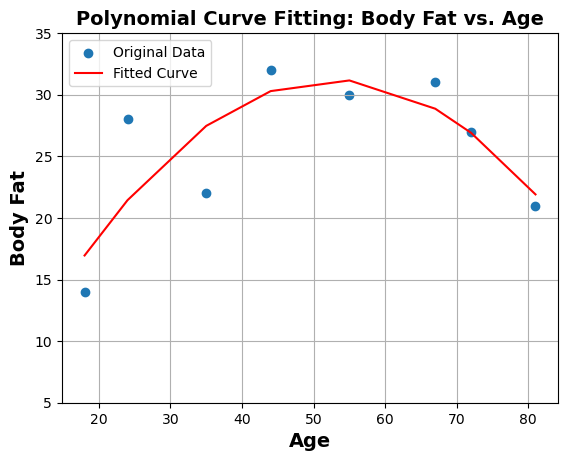

In [162]:
# Extracting data from DataFrame
age = df_filtered.index.values 
body_fat = df_filtered['BodyFat'].values

# Define the polynomial function to fit
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c

# Concatenate all data
x_data = age  # X data will be age
y_data = body_fat  # Y data will be body fat

# Perform curve fitting
popt, pcov = curve_fit(polynomial_function, x_data, y_data)

# Plot original data and fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, polynomial_function(x_data, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')
plt.yticks([5,10,15,20,25,30,35])
plt.xlabel('Age',fontsize=14,fontweight='bold')
plt.ylabel('Body Fat',fontsize=14,fontweight='bold')
plt.title('Polynomial Curve Fitting: Body Fat vs. Age',fontsize=14,fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

